# Aula 8 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples
- 3) Regressão linear múltipla
- 4) Overfitting

____
____
____

## 1) Introdução

Imagine que você que vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contanto com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target**, que é o preço pelo qual aquela casa foi vendida.

Por este motivo, estamos trabalhando com um problema de **APRENDIZAGEM SUPERVISIONADA**

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
# importe as principais bibliotecas de análise de dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leia a base "house_prices"

df = pd.read_csv("../datasets/house_prices.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# dê uma olhada nas 5 primeiras linhas

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# dê uma olhada na estrutura das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# algumas estatísticas rápidas?

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
# há dados missing?
# use um heatmap, se preferir!

nulos = df.isnull().sum()

In [10]:
nulos_pct = nulos/df.shape[0]

In [11]:
nulos_pct[nulos_pct>0.5]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [12]:
nulos_pct[(nulos_pct > 0) & (nulos_pct<0.5)]

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

<AxesSubplot:>

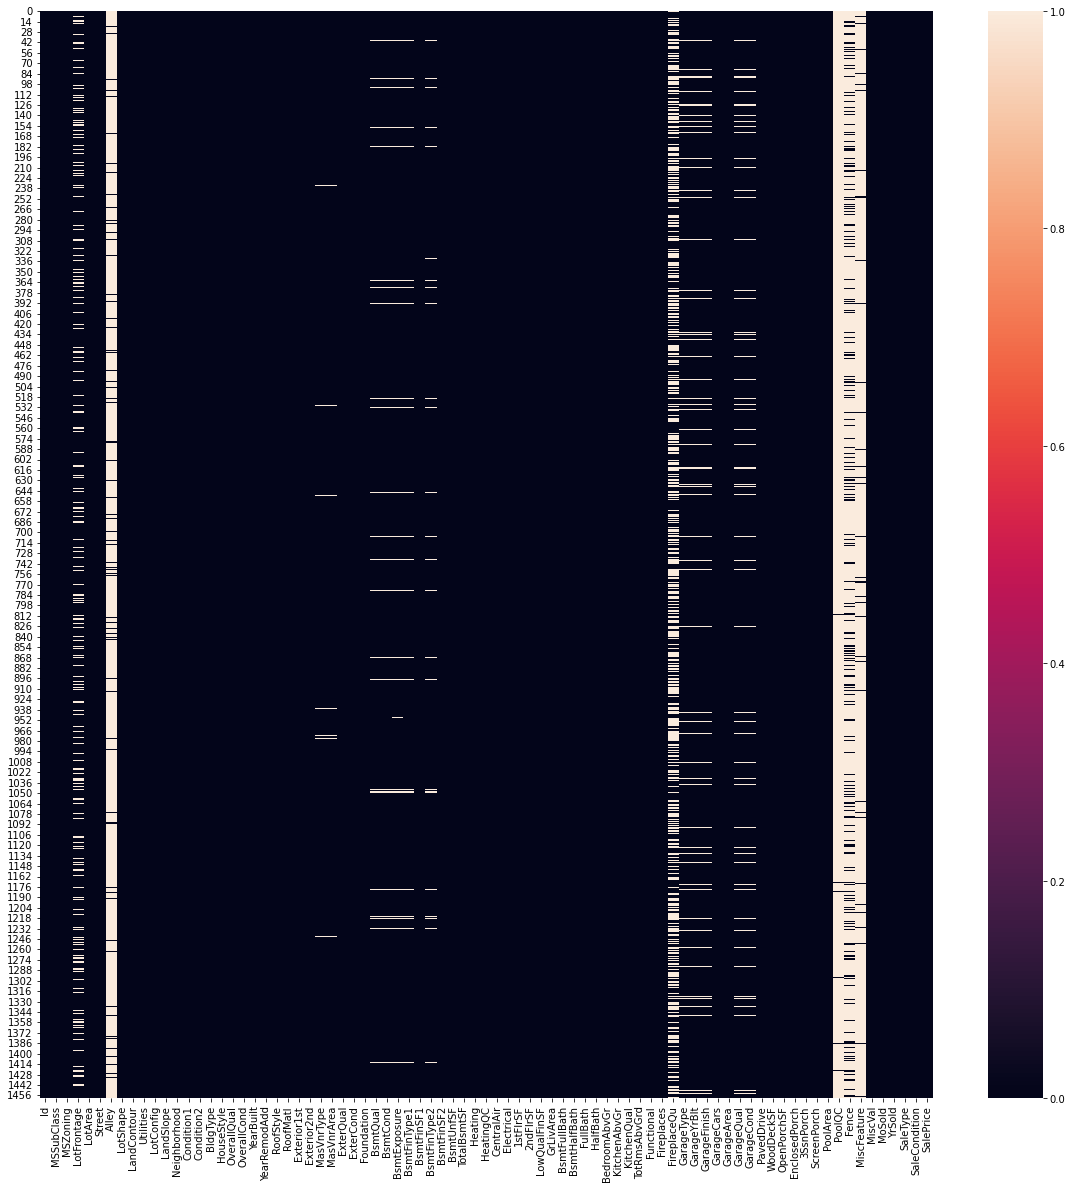

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isnull())

Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

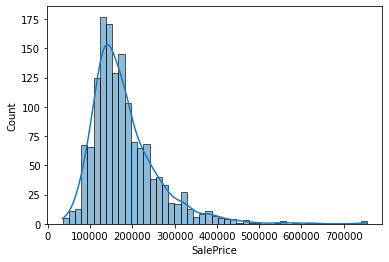

In [14]:
# dê uma olhada na distribuição dos preços "SalePrice"

sns.histplot(data=df, x="SalePrice", kde=True)

In [15]:
df["SalePrice"].skew()

1.8828757597682129

In [16]:
df["Log_Price"] = np.log10(df["SalePrice"])

<AxesSubplot:xlabel='Log_Price', ylabel='Count'>

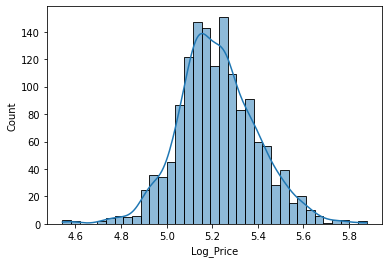

In [17]:
sns.histplot(data=df, x="Log_Price", kde=True)

In [18]:
df["Log_Price"].skew()

0.12133506220521131

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

In [19]:
# Dê uma olhada na correlação entre as variáveis

correlacao = df.corr(method="spearman")

<AxesSubplot:>

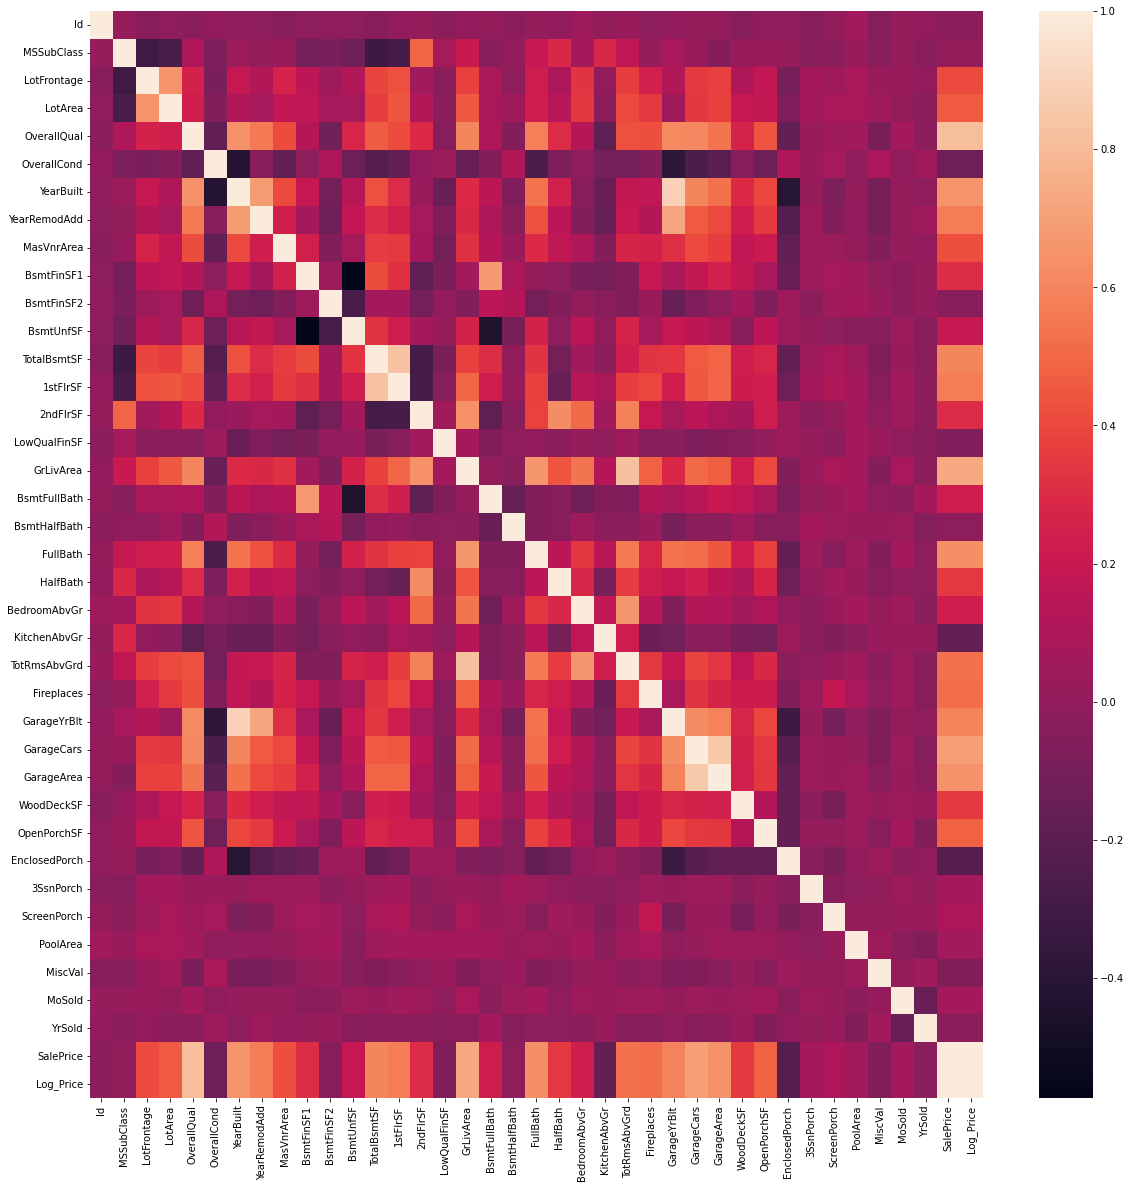

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlacao, annot=False)

In [21]:
correlacao["SalePrice"]

Id              -0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Log_Price   

In [22]:
correlacao["SalePrice"].abs()

Id               0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond      0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2       0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF     0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath     0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr     0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch    0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal          0.062727
MoSold           0.069432
YrSold           0.029899
SalePrice        1.000000
Log_Price   

In [23]:
# veja quais são as variáveis mais correlacionadas com o target!

cor_y = correlacao["SalePrice"].abs().sort_values(ascending=False)

In [24]:
cor_y[cor_y > 0.7]

Log_Price      1.000000
SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
Name: SalePrice, dtype: float64

In [25]:
cor_y[cor_y > 0.7].index

Index(['Log_Price', 'SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

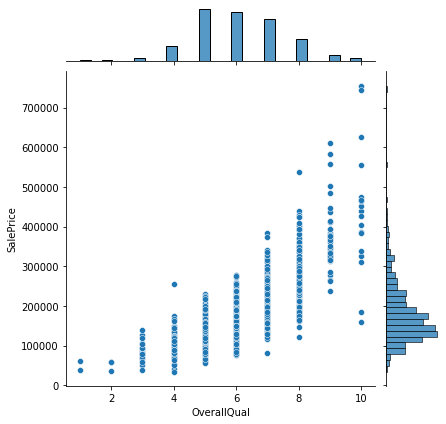

In [26]:
# explore agora a relação entre essas variáveis e o target
# dica: faça um jointplot ou scatterplot

sns.jointplot(data=df, x="OverallQual", y='SalePrice')

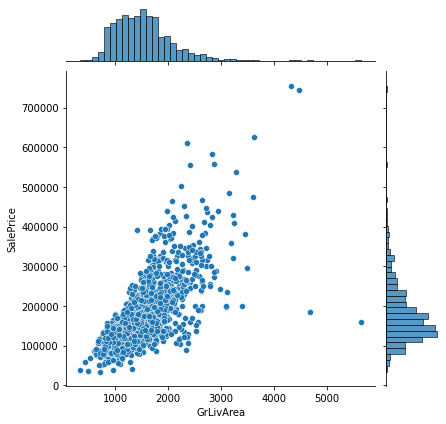

In [27]:
sns.jointplot(data=df, x="GrLivArea", y='SalePrice')

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

In [28]:
# identifique e remova os outliers

df = df[~(df["GrLivArea"] > 4500)]

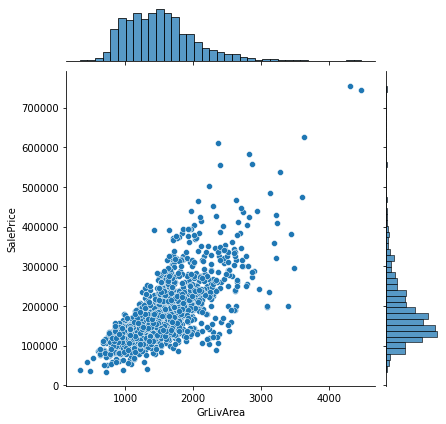

In [29]:
# faça o scatterplot novamente para verificar se os outliers sumiram

sns.jointplot(data=df, x="GrLivArea", y='SalePrice')

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ y = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular). 

O algoritmo do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** ou então o **gradiente descendente**.

Mas não nos preocuparemos com os detalhes do treinamento: usaremos o sklearn para isso!

Vamos começar?

In [30]:
# crie duas variáveis, X e y, respectivamente os arrays da feature GrLiveArea e do target


In [31]:
# 1) Importe a classe do estimador que se deseja treinar


In [32]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados


In [33]:
# 3) Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split" no google hehe



In [34]:
# 4) Treine o modelo, usando os dados de treino. 
# Este é um modelo simples, não tem muitos hiperparâmetros relevantes
# obs: é necessário dar um reshape nas features!


Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

In [35]:
# pegue o intercept. Dica: veja os atributos do modelo treinado!


In [36]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!


Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ y = 1562.01 + 118.61 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 118.6!

> O preço mínimo a ser pago, independente da área construída, é de 1562.01!

Podemos visualizar o modelo treinado, neste caso:

NameError: name 'modelo' is not defined

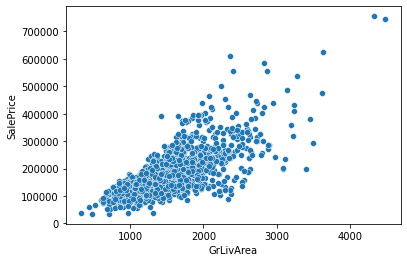

In [37]:
# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 5500, 10000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")

Linear Model = LM

In [ ]:
# é possível fazer o mesmo com o "sns.lmplot()", automaticamente!
sns.lmplot(data=df, x="GrLivArea", y="SalePrice")

Fazendo uma previsão:

In [ ]:
# previsão explicita, usando os coeficientes


Ou ainda:

In [ ]:
# previsão usando o predict


É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

In [ ]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 


Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

Para isso, podemos dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que**os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!**. Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

$$R(y_i) + \hat{y}_i= y_i  $$

$$ \hat{y}_i= y_i - R(y_i)  $$

In [ ]:
# faça um scatterplot do valor predito pelo valor real


O caso 100% ideal seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas isso não é tão significante, devido ao overfitting, que discutiremos a seguir. Mais sgnificativo é calcularmos o $R^2$ nos dados de teste como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**


In [ ]:
# r2_score do sklearn.metrics


Outra coisa importante é que os resíduos sejam **normalmente distribuídos**.

Se esse não for o caso, é muito importante que você reveja se o modelo escolhido de fato é adequado ao seu problema!

In [ ]:
# dê uma olhada na distribuição dos resíduos


Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido em aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

In [ ]:
# calcule MAE e MSE


Vamos dar uma olhada em tudo junto:


In [ ]:
X = df['GrLivArea']
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(np.array(X_treino).reshape(-1, 1), y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

plt.title("Modelo de regressão linear")

sns.scatterplot(data=df, x="GrLivArea", y="SalePrice")

x = np.linspace(0, 6000, 100000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")
plt.show()

print("\n####################################################\n")

# 5)
predictions = modelo.predict(np.array(X_teste).reshape(-1, 1))

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6) 
from sklearn import metrics

print('\nR^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Vamos fazer algumas mudanças?

___
___
___

## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso!

Para incorporar estas outras variáveis ao modelo, é muito simples! 

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que nada mais é que a seguinte equação:

$$ y = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos!

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

Vamos construir esse modelo?

In [ ]:
df.info()

In [ ]:
df.select_dtypes(include=[np.number]).info()

In [ ]:
df.isnull().sum()

In [ ]:
# selecione todas as outras colunas numéricas como a variável de features X
# dica: df.select_dtypes(include=[np.number])

df = df.select_dtypes(include=[np.number])

df = df.dropna(axis="columns", how="any")

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

In [ ]:
# de resto, pode seguir como tínhamos antes!

df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# dica: use o código abaixo para fazer um dataframe com os coeficientes

coeff_df = pd.DataFrame(modelo.coef_, X.columns, columns=['Coefficient'])

coeff_df

Para quem quiser um pouco mais de informação estatística sobre o modelo, use a bibliotexa statsmodels:

In [ ]:
df = df.select_dtypes(include=[np.number])
df = df.dropna(axis="columns", how="any")

X = df.drop(columns=["Id","SalePrice"])
y = df['SalePrice']

# 1)
import statsmodels.api as sm

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 2)
estimador = sm.OLS(y_treino, X_treino)

# 4)
modelo = estimador.fit()

In [ ]:
modelo.summary()

A performance do modelo melhorou?

Será que dá pra melhorar mais?

Opções:

- tentar apenas um subconjunto de features: **feature selection**


- passar a utilizar as features categóricas: **feacture engeneering**

____
____
____

## 4) Overfitting

Overfit é um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

Para demonstrar overfit ser usado o conjuto de teste [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [ ]:
df_anscombe = sns.load_dataset('anscombe')

df_anscombe

In [ ]:
df = df_anscombe[df_anscombe["dataset"] == "III"].copy()

df

In [ ]:
sns.scatterplot(data=df, x='x',y='y')

Vamos supor que este dado represente valores de medições de um sensor, porém o sensor teve um pequeno problema durante a medição.

Podemos perceber facilmente qual é este erro, e qual seria a função de regreesão para este sensor com os dados validos: **regressão linear**.

In [ ]:
sns.lmplot(data=df, x='x', y='y', ci=False)

Perceba que a função linear encontrar já aprensenta um padrão muito similiar aos dados, porém um ponto error faz com que ela não tenha um resultado otimo.

Podemos utilizar regressões polinomiais, que possuem ordem maiores que 1, para tentar diminuir o erro da regressão, obtendo uma equação do formato.

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \cdots + \beta_{6} {x_{i}}^{6}$$

Para criar modelos polinomiaus com o sklearn, [dê uma olhada aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
# pra sumir os wanings
import warnings 
warnings.filterwarnings('ignore')

sns.lmplot(data=df, x='x', y='y', order=11, ci=False)

Ao utilizarmos uma regressão de ordem 6 percebemos que ela se ajusta ao valor com erro, porém ela **se distancia da regressão que realmente representa os dados**. 

Tentar **aprender o erro faz com ela com ela não aprenda a função real**. 

Isto acontece pois ela se **super ajustou aos dados de treino, se distanciando dos dados reais**. 

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **Redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino!!**. O que queremos otimizar sempre será a performance **avaliada nos dados de teste**. Assim, garantimos que uma boa performance não é produto do overfitting!

____
___
___